In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('mm_data.csv')

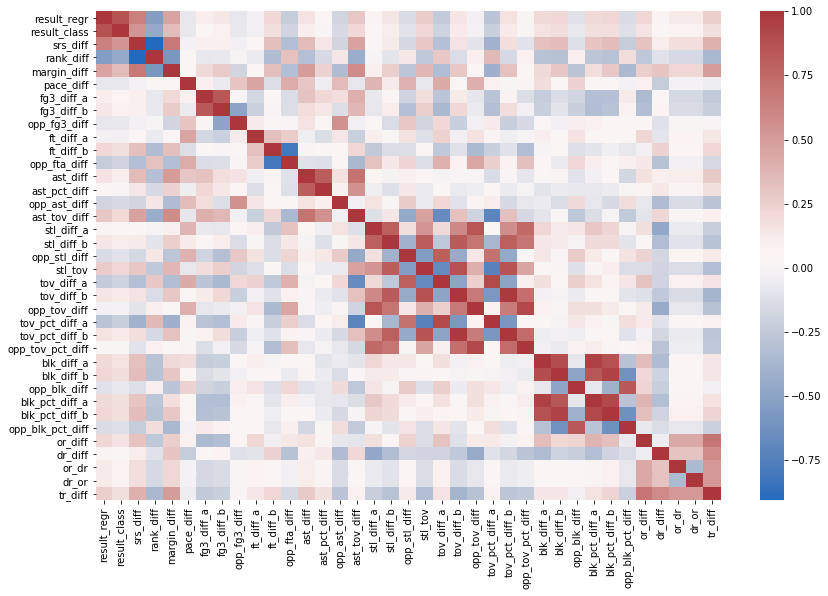

In [3]:
corr = df.corr('spearman')
fig = plt.figure(figsize=(14,9))
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='vlag')

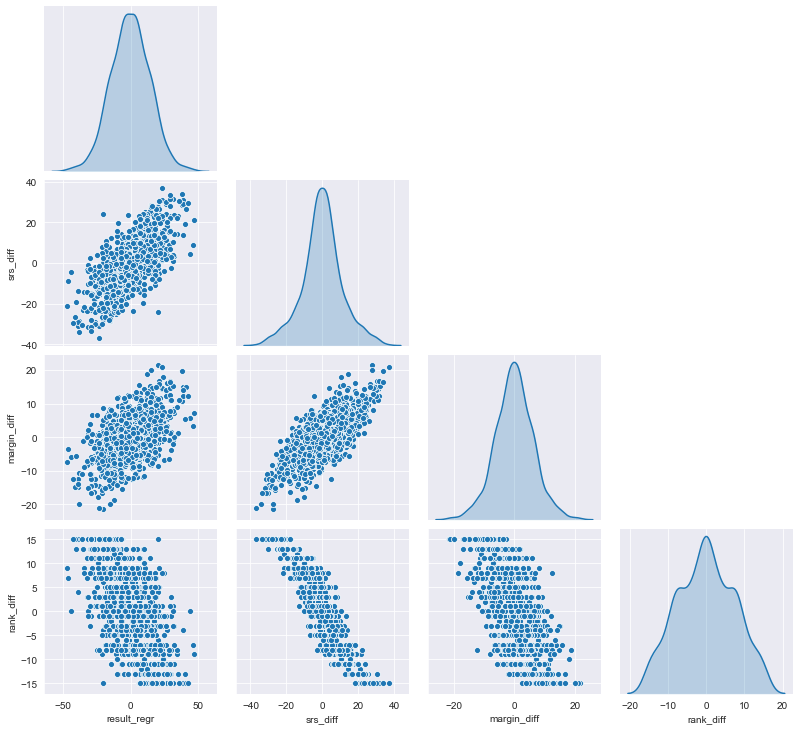

In [41]:
sns.set_style('darkgrid')
# _ = plt.scatter(df['srs_diff'], df['result_regr'], marker='+', alpha=0.4)
# _ = sns.scatterplot('srs_diff', 'result_regr', data=df, alpha=0.4)
_ = sns.pairplot(df[['result_regr','srs_diff','margin_diff','rank_diff']], corner=True, diag_kind='kde', aspect=1.1)

#### Dummy Classifier
##### Higher-ranked team predicted as victor; ties settled by margin_diff

In [57]:
dummy_clf = df['rank_diff'].apply(lambda x: 1 if x<0 else (0 if x>0 else -1))
backup = df['margin_diff'].apply(lambda x: 1 if x>0 else 0)
dummy_clf[dummy_clf < 0] = backup[dummy_clf < 0]

In [113]:
from sklearn.metrics import accuracy_score, roc_auc_score
print(['Accuracy = ' + str(np.round(accuracy_score(df['result_class'], dummy_clf),3)) + \
       ';  AUC = ' + str(np.round(roc_auc_score(df['result_class'], dummy_clf),3))])

['Accuracy = 0.687;  AUC = 0.687']


#### Gradient Boosted Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall').fit(X_train, y_train)

print(gs.cv_results_['mean_test_score'])

#### Dummy Regressor
##### Simple linear regression with srs_diff

In [98]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

dummy_reg_cv = cross_validate(linear_model.LinearRegression(fit_intercept=False), 
                              np.array(df['srs_diff']).reshape(-1,1), y=df['result_regr'], 
                              scoring=['r2','neg_mean_absolute_error'], return_estimator=True)

In [99]:
print('Cross-Validated Stats: R2 =', np.round(dummy_reg_cv['test_r2'].mean(), 3), 
      ';  MAE =', np.round(dummy_reg_cv['test_neg_mean_absolute_error'].mean(), 2))

Cross-Validated Stats: R2 = 0.384 ;  MAE = -8.38


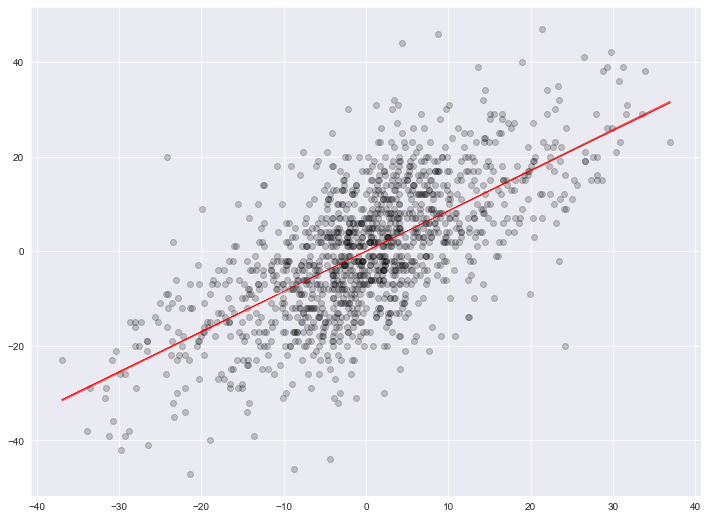

In [112]:
fig = plt.figure(figsize=(12,9))
_ = plt.scatter(df['srs_diff'], df['result_regr'],  color='black', alpha=0.2)
_ = plt.plot(df['srs_diff'], dummy_reg_cv['estimator'][0].predict(np.array(df['srs_diff']).reshape(-1,1)), color='red', linewidth=0.25)
_ = plt.plot(df['srs_diff'], dummy_reg_cv['estimator'][1].predict(np.array(df['srs_diff']).reshape(-1,1)), color='red', linewidth=0.25)
_ = plt.plot(df['srs_diff'], dummy_reg_cv['estimator'][2].predict(np.array(df['srs_diff']).reshape(-1,1)), color='red', linewidth=0.25)
_ = plt.plot(df['srs_diff'], dummy_reg_cv['estimator'][3].predict(np.array(df['srs_diff']).reshape(-1,1)), color='red', linewidth=0.25)
_ = plt.plot(df['srs_diff'], dummy_reg_cv['estimator'][4].predict(np.array(df['srs_diff']).reshape(-1,1)), color='red', linewidth=0.25)